In [12]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Dropout, BatchNormalization, Conv1D, MaxPool1D, Flatten, Reshape
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

from code.modelhelper import *

# MLP w/ Engineered Features

In [2]:
BATCH_SIZE = 512
N_CLASS = 2
EPOCHS = 200

In [3]:
x = np.load("data/xy/x_feat_630.npz")["arr_0"]
y = np.load("data/xy/y_onehot_45_15.npy")

In [4]:
x.shape

(60000, 630)

In [5]:
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=11)

In [6]:
model_input = Input(shape=(x.shape[1], ), name="m1_input")
H = Dense(50, activation='relu', name="m1_dense_1")(model_input)
H = Dense(100, activation="relu", name="m1_dense_2")(H)
H = Dense(150, activation="relu", name="m1_dense_3")(H)
H = Dense(200, activation="relu", name="m1_dense_4")(H)
H = Dropout(0.4, name="m1_dropout_1")(H)

model_output = Dense(N_CLASS, activation="softmax", name="m1_output")(H)

model = Model(inputs=model_input, outputs=model_output)
model.summary()

model.compile(
    loss='categorical_crossentropy',
    optimizer='nadam',
    metrics=['accuracy']
)

es = EarlyStopping(
    mode="auto",
    monitor="val_loss",
    patience=5,
    restore_best_weights=True
)

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
m1_input (InputLayer)        [(None, 630)]             0         
_________________________________________________________________
m1_dense_1 (Dense)           (None, 50)                31550     
_________________________________________________________________
m1_dense_2 (Dense)           (None, 100)               5100      
_________________________________________________________________
m1_dense_3 (Dense)           (None, 150)               15150     
_________________________________________________________________
m1_dense_4 (Dense)           (None, 200)               30200     
_________________________________________________________________
m1_dropout_1 (Dropout)       (None, 200)               0         
_________________________________________________________________
m1_output (Dense)            (None, 2)                 402   

In [8]:
history = model.fit(
    x_train, y_train,
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    verbose=2,
    validation_data=(x_test, y_test),
    callbacks=[es]
)

Train on 48000 samples, validate on 12000 samples
Epoch 1/200
48000/48000 - 3s - loss: 0.3542 - accuracy: 0.8541 - val_loss: 0.2424 - val_accuracy: 0.9122
Epoch 2/200
48000/48000 - 1s - loss: 0.2213 - accuracy: 0.9212 - val_loss: 0.2084 - val_accuracy: 0.9264
Epoch 3/200
48000/48000 - 1s - loss: 0.2087 - accuracy: 0.9272 - val_loss: 0.2057 - val_accuracy: 0.9289
Epoch 4/200
48000/48000 - 1s - loss: 0.2027 - accuracy: 0.9301 - val_loss: 0.1972 - val_accuracy: 0.9333
Epoch 5/200
48000/48000 - 1s - loss: 0.1975 - accuracy: 0.9317 - val_loss: 0.2006 - val_accuracy: 0.9340
Epoch 6/200
48000/48000 - 1s - loss: 0.1965 - accuracy: 0.9328 - val_loss: 0.1910 - val_accuracy: 0.9348
Epoch 7/200
48000/48000 - 1s - loss: 0.1923 - accuracy: 0.9331 - val_loss: 0.1919 - val_accuracy: 0.9353
Epoch 8/200
48000/48000 - 1s - loss: 0.1926 - accuracy: 0.9340 - val_loss: 0.2014 - val_accuracy: 0.9346
Epoch 9/200
48000/48000 - 1s - loss: 0.1897 - accuracy: 0.9346 - val_loss: 0.1942 - val_accuracy: 0.9339
Epoch

Epoch 78/200
48000/48000 - 1s - loss: 0.1726 - accuracy: 0.9405 - val_loss: 0.1776 - val_accuracy: 0.9390
Epoch 79/200
48000/48000 - 1s - loss: 0.1738 - accuracy: 0.9401 - val_loss: 0.1773 - val_accuracy: 0.9391
Epoch 80/200
48000/48000 - 1s - loss: 0.1724 - accuracy: 0.9408 - val_loss: 0.1758 - val_accuracy: 0.9397
Epoch 81/200
48000/48000 - 1s - loss: 0.1733 - accuracy: 0.9409 - val_loss: 0.1743 - val_accuracy: 0.9392
Epoch 82/200
48000/48000 - 1s - loss: 0.1741 - accuracy: 0.9400 - val_loss: 0.1756 - val_accuracy: 0.9396
Epoch 83/200
48000/48000 - 1s - loss: 0.1713 - accuracy: 0.9413 - val_loss: 0.1750 - val_accuracy: 0.9393
Epoch 84/200
48000/48000 - 1s - loss: 0.1719 - accuracy: 0.9412 - val_loss: 0.1783 - val_accuracy: 0.9402
Epoch 85/200
48000/48000 - 1s - loss: 0.1711 - accuracy: 0.9403 - val_loss: 0.1752 - val_accuracy: 0.9399
Epoch 86/200
48000/48000 - 1s - loss: 0.1716 - accuracy: 0.9408 - val_loss: 0.1761 - val_accuracy: 0.9401
Epoch 87/200
48000/48000 - 1s - loss: 0.1721 -

Epoch 155/200
48000/48000 - 1s - loss: 0.1683 - accuracy: 0.9412 - val_loss: 0.1717 - val_accuracy: 0.9417
Epoch 156/200
48000/48000 - 1s - loss: 0.1682 - accuracy: 0.9420 - val_loss: 0.1747 - val_accuracy: 0.9405
Epoch 157/200
48000/48000 - 1s - loss: 0.1686 - accuracy: 0.9421 - val_loss: 0.1721 - val_accuracy: 0.9405
Epoch 158/200
48000/48000 - 1s - loss: 0.1684 - accuracy: 0.9415 - val_loss: 0.1716 - val_accuracy: 0.9417
Epoch 159/200
48000/48000 - 1s - loss: 0.1681 - accuracy: 0.9414 - val_loss: 0.1707 - val_accuracy: 0.9417
Epoch 160/200
48000/48000 - 1s - loss: 0.1680 - accuracy: 0.9416 - val_loss: 0.1745 - val_accuracy: 0.9402
Epoch 161/200
48000/48000 - 1s - loss: 0.1673 - accuracy: 0.9412 - val_loss: 0.1727 - val_accuracy: 0.9407
Epoch 162/200
48000/48000 - 1s - loss: 0.1673 - accuracy: 0.9420 - val_loss: 0.1752 - val_accuracy: 0.9397
Epoch 163/200
48000/48000 - 1s - loss: 0.1694 - accuracy: 0.9415 - val_loss: 0.1735 - val_accuracy: 0.9400
Epoch 164/200
48000/48000 - 1s - loss

In [9]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

y_pred_model = model.predict(x_test.astype("float"))
y_pred = to_bin(y_pred_model)
print("Test recall: {}".format(recall(y_test, y_pred)))

y_test0 = to_1D(y_test)
y_pred0 = to_1D(y_pred)
print(confusion_matrix(y_test0, y_pred0))

Test loss: 0.1721613319516182
Test accuracy: 0.94058335
Test recall: 0.7955390334572491
[[8933  108]
 [ 605 2354]]


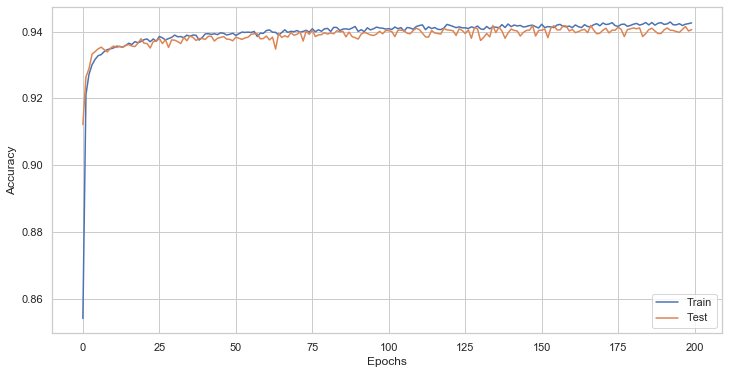

In [10]:
plt.figure(figsize=(12, 6))
plt.plot(history.history["accuracy"], label="Train")
plt.plot(history.history["val_accuracy"], label="Test")
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.show()

In [12]:
model.save("models/dl/m1.h5")

# K-fold CV

In [7]:
model_params = {
    "batch_size": BATCH_SIZE,
    "epochs": EPOCHS,
    "es": es,
}

In [8]:
scores = kfold(model, model_params, x, y, 10)

Train on 54000 samples, validate on 6000 samples
Epoch 1/200
54000/54000 - 2s - loss: 0.3859 - accuracy: 0.8447 - val_loss: 0.2230 - val_accuracy: 0.9210
Epoch 2/200
54000/54000 - 1s - loss: 0.2319 - accuracy: 0.9209 - val_loss: 0.1781 - val_accuracy: 0.9417
Epoch 3/200
54000/54000 - 1s - loss: 0.1825 - accuracy: 0.9389 - val_loss: 0.1841 - val_accuracy: 0.9440
Epoch 4/200
54000/54000 - 1s - loss: 0.1754 - accuracy: 0.9417 - val_loss: 0.1640 - val_accuracy: 0.9420
Epoch 5/200
54000/54000 - 1s - loss: 0.1687 - accuracy: 0.9442 - val_loss: 0.1710 - val_accuracy: 0.9428
Epoch 6/200
54000/54000 - 1s - loss: 0.1612 - accuracy: 0.9467 - val_loss: 0.1525 - val_accuracy: 0.9492
Epoch 7/200
54000/54000 - 1s - loss: 0.1554 - accuracy: 0.9479 - val_loss: 0.1563 - val_accuracy: 0.9457
Epoch 8/200
54000/54000 - 1s - loss: 0.1543 - accuracy: 0.9477 - val_loss: 0.1446 - val_accuracy: 0.9503
Epoch 9/200
54000/54000 - 1s - loss: 0.1488 - accuracy: 0.9507 - val_loss: 0.1456 - val_accuracy: 0.9518
Epoch 

54000/54000 - 1s - loss: 0.1191 - accuracy: 0.9607 - val_loss: 0.1303 - val_accuracy: 0.9547
Epoch 2/200
54000/54000 - 1s - loss: 0.1183 - accuracy: 0.9604 - val_loss: 0.1254 - val_accuracy: 0.9570
Epoch 3/200
54000/54000 - 1s - loss: 0.1184 - accuracy: 0.9613 - val_loss: 0.1193 - val_accuracy: 0.9593
Epoch 4/200
54000/54000 - 1s - loss: 0.1184 - accuracy: 0.9606 - val_loss: 0.1284 - val_accuracy: 0.9572
Epoch 5/200
54000/54000 - 1s - loss: 0.1167 - accuracy: 0.9614 - val_loss: 0.1535 - val_accuracy: 0.9440
Epoch 6/200
54000/54000 - 1s - loss: 0.1160 - accuracy: 0.9615 - val_loss: 0.1218 - val_accuracy: 0.9588
Epoch 7/200
54000/54000 - 1s - loss: 0.1156 - accuracy: 0.9624 - val_loss: 0.1205 - val_accuracy: 0.9597
Epoch 8/200
54000/54000 - 1s - loss: 0.1156 - accuracy: 0.9613 - val_loss: 0.1281 - val_accuracy: 0.9565
Train on 54000 samples, validate on 6000 samples
Epoch 1/200
54000/54000 - 1s - loss: 0.1192 - accuracy: 0.9603 - val_loss: 0.1145 - val_accuracy: 0.9625
Epoch 2/200
54000/

In [11]:
for score in scores:
    for key, val in score.items():
        print(key, val)
    print()

accuracy 0.9578333333333333
precision 0.955871353777113
recall 0.8682065217391305
fallout 0.013030035335689047

accuracy 0.956
precision 0.9447272727272727
recall 0.8735709482178884
fallout 0.016840239308663858

accuracy 0.9541666666666667
precision 0.9531946508172363
recall 0.8581939799331104
fallout 0.013984461709211986

accuracy 0.9608333333333333
precision 0.9608127721335269
recall 0.879734219269103
fallout 0.012013348164627364

accuracy 0.9578333333333333
precision 0.9689863842662633
recall 0.8580040187541862
fallout 0.009096960284002663

accuracy 0.9596666666666667
precision 0.9481641468682506
recall 0.8856758574310692
fallout 0.015953910923997342

accuracy 0.9623333333333334
precision 0.9705035971223022
recall 0.8794002607561929
fallout 0.009180474697716077

accuracy 0.9593333333333334
precision 0.9567411679884643
recall 0.8782263401720715
fallout 0.013366005791935844

accuracy 0.9625
precision 0.9652777777777778
recall 0.8881789137380192
fallout 0.011273957158962795

accuracy 0

In [13]:
from numba import jit

@jit
def scores_dict_to_array(scores_dict):
    arr = np.zeros(shape=(4, len(scores_dict)))

    for i, score in enumerate(scores_dict):
        for j, val in enumerate(score.values()):
            arr[j][i] = val

    return arr

In [14]:
arr = scores_dict_to_array(scores)
arr

array([[0.95783333, 0.956     , 0.95416667, 0.96083333, 0.95783333,
        0.95966667, 0.96233333, 0.95933333, 0.9625    , 0.96216667],
       [0.95587135, 0.94472727, 0.95319465, 0.96081277, 0.96898638,
        0.94816415, 0.9705036 , 0.95674117, 0.96527778, 0.96575342],
       [0.86820652, 0.87357095, 0.85819398, 0.87973422, 0.85800402,
        0.88567586, 0.87940026, 0.87822634, 0.88817891, 0.87456926],
       [0.01303004, 0.01684024, 0.01398446, 0.01201335, 0.00909696,
        0.01595391, 0.00918047, 0.01336601, 0.01127396, 0.00989228]])

In [15]:
np.save("cv/m1_cv.npy", arr)